<a href="https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰


## サンプルデータの読み込み

In [6]:
# ボストン市の住宅価格データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston() 

import pandas as pd

# 説明変数(boston.data)をDataFrameに保存
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) 
# 目的変数(boston.target)もDataFrameに追加
boston_df['MEDV'] = boston.target 
# データの様子を確認
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 参考情報
* CRIM：犯罪発生率
* ZN：25,000平方フィート以上の住宅区画の割合
* INDUS：	非小売業種の土地面積の割合
* CHAS：チャールズ川沿いかを表すダミー変数
* NOX：窒素酸化物の濃度
* RM：平均部屋数
* AGE：1940年より前に建てられた建物の割合
* DIS：5つのボストンの雇用施設への重み付き距離
* RAD：高速道路へのアクセスのしやすさ
* TAX：10,000ドルあたりの不動産税率
* PTRATIO：生徒と教師の割合
* B：黒人の割合
* LSTAT：低所得者の割合
* MEDV：住宅価格の中央値（1,000単位）

データの項目に差別的なものが含まれていて、学習用のデータとしては適切でない感がありますが、sklearn の標準サンプルということでご了承下さい。

##  例として、RM（平均部屋数）とMEDV（住宅価格）の相関を視覚化


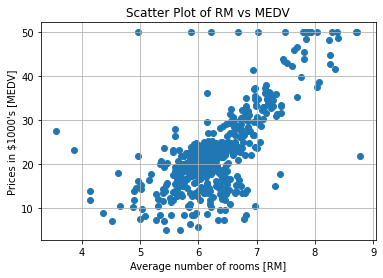

In [7]:
import matplotlib.pyplot as plt
plt.scatter(boston_df['RM'], boston_df['MEDV']) 

plt.title('Scatter Plot of RM vs MEDV')  
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')   
plt.grid()  

plt.show() 